# GDL for main graph rewiring and metrics comparison

## Import libraries

In [9]:
import sys
print(sys.executable)
from pathlib import Path
import torch
import torch_geometric
print(torch.__version__)
print(torch_geometric.__version__)

import matplotlib.pyplot as plt
from torch_geometric.datasets import TUDataset
# from GraphRicciCurvature.FormanRicci import FormanRicci

import networkx as nx
import numpy as np
from scipy.sparse.csgraph import laplacian
from scipy.linalg import pinv, eigvalsh

from utils.load_data import *
from evaluation.metrics import *
from evaluation.metrics_distance import *
from evaluation.curvature import *
from visualization.plots import *
from visualization.networkx_plot import *


/media/alexandre/morespace/data/amgb20/CAM_venv/bin/python
2.4.0+cpu
2.7.0


# Rewiring our graphs

🚩 We need to respect the experimental details of hyperparameters describe on page 15

## Dynamic Graph Rewiring Method Code

In [ ]:
from ipywidgets import widgets, Tab, VBox, Output

dataset_names = ["MUTAG"]  # Default dataset selection
REWIRING_METHOD = "BORF"   # Default rewiring method
ENTIRE_GRAPH = False       # Default entire graph selection
metrics = "Normal"    
show = False     

output = Output()  

data = widgets.Dropdown(
    options=["REDDIT-BINARY", "IMDB-BINARY", "MUTAG", "ENZYMES", "PROTEINS"],
    value="MUTAG",
    description="Dataset:"
)

rewired_method = widgets.Dropdown(
    options=["BORF", "SDRF", "FOSR", "DES", "PPR", "LASER", "UNREWIRED"],
    value="BORF",
    description="Rewiring Method:"
)

entire_graph = widgets.Checkbox(
    value=False,
    description="Entire Graph"
)


metric = widgets.Dropdown(
    options=["Distance", "Normal"],
    value="Normal",
    description="Metrics:"
)

show_plots = widgets.Checkbox(
    value=False,
    description="Show plots"
)


def update_dataset(change):
    global dataset_names
    dataset_names = [change["new"]]
    with output:
        output.clear_output()
        print(f"Dataset Selected: {dataset_names}")

def update_rewiring_method(change):
    global REWIRING_METHOD
    REWIRING_METHOD = change["new"]
    with output:
        output.clear_output()
        print(f"Rewiring Method Selected: {REWIRING_METHOD}")

def update_entire_graph(change):
    global ENTIRE_GRAPH
    ENTIRE_GRAPH = change["new"]
    with output:
        output.clear_output()
        print(f"Entire Graph Selected: {ENTIRE_GRAPH}")

def update_show_plot(change):
    global show
    show = change["new"]
    with output:
        output.clear_output()
        print(f"Showing plots Selected: {show}")

def update_metrics(change):
    global metrics
    metrics = change["new"]
    with output:
        output.clear_output()
        print(f"Metrics Selected: {metrics}")


data.observe(update_dataset, names="value")
rewired_method.observe(update_rewiring_method, names="value")
entire_graph.observe(update_entire_graph, names="value")
show_plots.observe(update_show_plot, names="value")
metric.observe(update_metrics, names="value")


tab_contents = [
    VBox([data]),
    VBox([rewired_method]),
    VBox([entire_graph]),
    VBox([metric]),
    VBox([show_plots])
]

tab = Tab(children=tab_contents)

# Set tab titles
for i, title in enumerate(["Dataset", "Rewiring Method", "Entire Graph", "Metrics", "Show Plots"]):
    tab.set_title(i, title)

display(tab, output)


Output()

In [18]:

print(f"Selected dataset: {dataset_names}")
print(f"Selected rewiring method: {REWIRING_METHOD}")
print(f"Selected entire graph: {ENTIRE_GRAPH}")
print(f"Selected metrics: {metrics}")
print(f"Selected show plots: {show}")

Selected dataset: ['MUTAG']
Selected rewiring method: FOSR
Selected entire graph: True
Selected metrics: Normal
Selected show plots: True


## Playground

⚠️ Warning: 'MUTAG' not found. Did you mean 'MUTAG'?
✅ Dataset MUTAG already exists. Loading from disk...
✅ Converted 188 graphs from MUTAG into NetworkX format.
Rewiring methods being used: BORF

🚀 Processing dataset: MUTAG


  0%|          | 0/188 [00:00<?, ?it/s]/media/alexandre/morespace/University of Cambridge/L65/L65-Mini-Project/rewiring/borf/borf.py:269: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental 

[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge att

/media/alexandre/morespace/University of Cambridge/L65/L65-Mini-Project/rewiring/borf/borf.py:269: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  edge_index = torch.load(f)
/

Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal ex

/media/alexandre/morespace/University of Cambridge/L65/L65-Mini-Project/rewiring/borf/borf.py:269: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  edge_index = torch.load(f)
/

[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge att

/media/alexandre/morespace/University of Cambridge/L65/L65-Mini-Project/rewiring/borf/borf.py:269: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  edge_index = torch.load(f)
/

Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal ex

/media/alexandre/morespace/University of Cambridge/L65/L65-Mini-Project/rewiring/borf/borf.py:269: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  edge_index = torch.load(f)
/

[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge att

/media/alexandre/morespace/University of Cambridge/L65/L65-Mini-Project/rewiring/borf/borf.py:269: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  edge_index = torch.load(f)
/

[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
[INFO] Rewired graph for 50 iterations, 4 edge additions and 2 edge removal exists...
Getting formanCurvature edge attributes
Index with largest curvature difference: 0 difference= 0.0


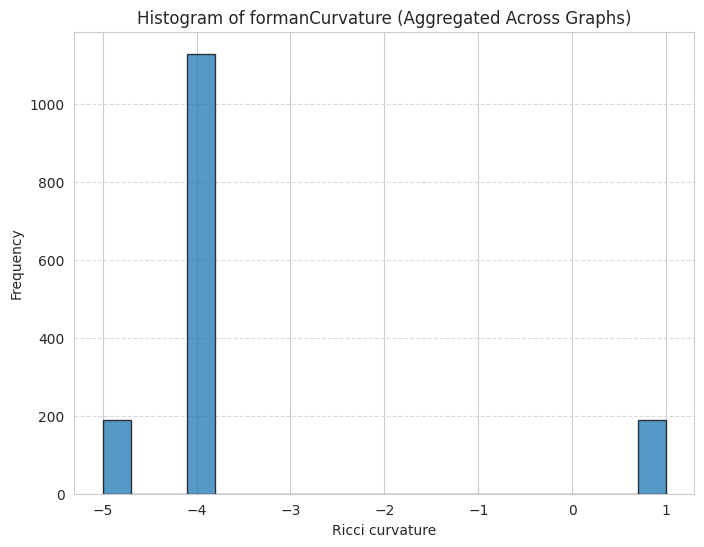

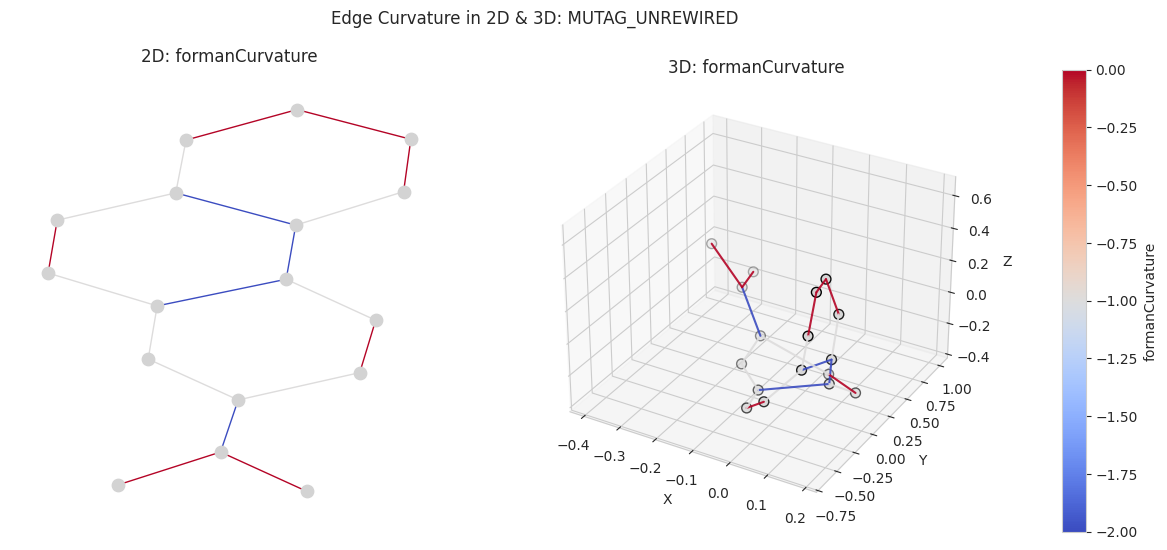

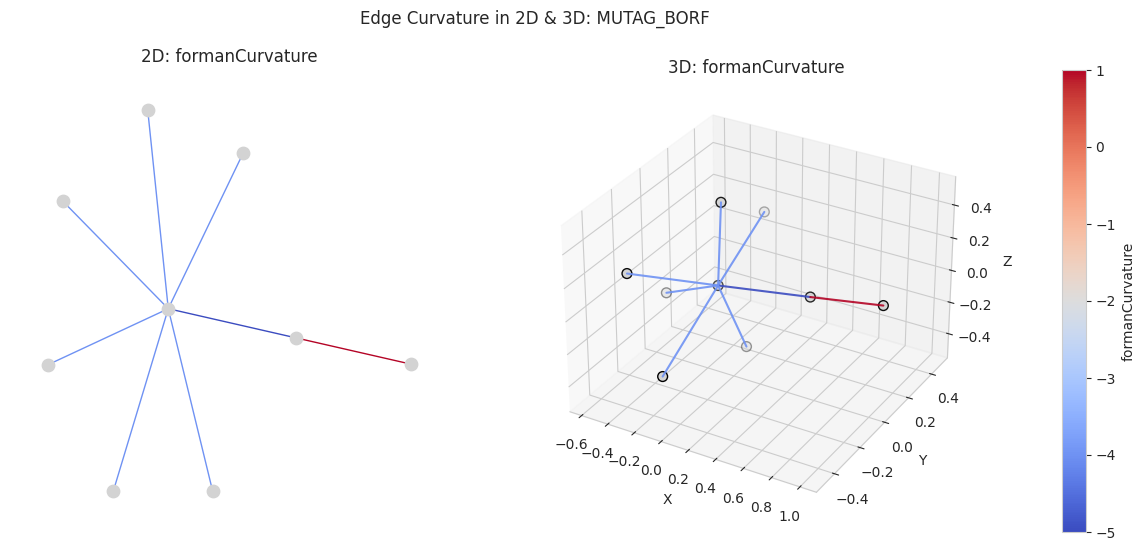


📂 Summary (Mean & Std) results saved to results/rewired_graph_avg_std_metrics_MUTAG_BORF.csv.


In [ ]:
from rewiring.rewiring_call import *
from tqdm import tqdm
import tkinter as tk
from tkinter import ttk, messagebox

# dataset_names = ["REDDIT-BINARY", "IMDB-BINARY", "MUTAG", "ENZYMES", "PROTEINS"]
# dataset_names = ["IMDB-BINARY", "MUTAG", "ENZYMES", "PROTEINS"]
#                   0              1            2         3           4
# dataset_names = dataset_names[2]

# REWIRING_METHOD = ["BORF","SDRF", "FOSR", "LASER", "UNREWIRED"]
# REWIRING_METHOD = ["BORF","SDRF", "FOSR", "DES","PPR", "LASER", "UNREWIRED"]
# #                   0       1       2       3      4      5         6
# REWIRING_METHOD = REWIRING_METHOD[0]

# # flag all graph rewiring or not
# ENTIRE_GRAPH = True

dataset_loader = GraphDatasetLoader(dataset_names)
loaded_datasets = dataset_loader.get_loaded_dataset_names()

all_metrics_df = []
all_curvature = []
all_rewired_graphs_curv = []
all_unrewired_graphs_curv = []
all_curvature_unrewired = []
diff_measures = []

graphs_dict = {method: [] for method in REWIRING_METHOD}

for dataset_name in loaded_datasets:
    for rewiring_name in [REWIRING_METHOD]:
        print("Rewiring methods being used:", rewiring_name)
        print(f"\n🚀 Processing dataset: {dataset_name}")
        
        # for testing purposes we can test on one graph
        if not ENTIRE_GRAPH:  
            # Get first graph
            graphs = dataset_loader.first_graphs[dataset_name]
            # print("first graph", type(graphs))
        else:
            graphs = dataset_loader.datasets[dataset_name]  # Load full dataset
            
        for graph in tqdm(graphs):
            
            graph_copy = graph.clone()
            
            if isinstance(graphs, torch_geometric.data.data.Data):
                rewiring_method = rewiring_call(graphs, dataset_name)
            else:
                rewiring_method = rewiring_call(graph, dataset_name)
            
            if rewiring_name == "BORF":
                rewired_graph = rewiring_method.borf_rewiring()
            elif rewiring_name == "SDRF":
                rewired_graph = rewiring_method.sdrf_rewiring()
            elif rewiring_name == "FOSR":
                rewired_graph = rewiring_method.fosr_rewiring()
            elif rewiring_name == "LASER":
                rewired_graph = rewiring_method.laser_rewiring()
            elif rewiring_name == "DES":
                rewired_graph = rewiring_method.des_rewiring(dataset_loader)
            elif rewiring_name == "PPR":
                rewired_graph = rewiring_method.ppr_rewiring()
            elif rewiring_name == "UNREWIRED":
                
                G_nx = to_networkx(graph, to_undirected=True)  # Convert PyG graph to NetworkX
                print("G_nx", G_nx)
                rewired_graph = G_nx
            else:
                raise ValueError(f"Invalid rewiring method: {rewiring_name}")
            
            graphs_dict[rewiring_name].append(rewired_graph)
                        
            # Compute metrics for the rewired graph
            metrics_rewired = GraphMetrics(rewired_graph, dataset_name)
            df_metrics, curv_G = metrics_rewired.get_forman() # just for forman
            # df_metrics, curv_G = metrics_rewired.get_orc()
            # df_metrics = metrics_rewired.get_eff_res_compa()
            # df_metrics = metrics_rewired.get_all_metrics()
            df_metrics = pd.DataFrame([df_metrics]) 
            df_metrics["Rewiring Method"] = rewiring_name
            df_metrics["Dataset"] = dataset_name
            
            # Extract Ricci curvatures from this graph and append to list
            edges = list(curv_G.edges())
            if edges:
                u, v = edges[0]  # First edge in the graph
                if "ricciCurvature" in curv_G[u][v]:
                    curvatures = nx.get_edge_attributes(curv_G, "ricciCurvature").values()
                    curvature_name = "ricciCurvature"
                    print("Getting RicciCurvature edge attributes")
                    
                elif "formanCurvature" in curv_G[u][v]:
                    curvatures = nx.get_edge_attributes(curv_G, "formanCurvature").values()
                    
                    G_nx = to_networkx(graph, to_undirected=True)  # Convert PyG graph to NetworkX
                    metric_unrewired = GraphMetrics(G_nx, dataset_name)
                    _, curv_G_unrewired = metric_unrewired.get_forman()
                    curvature_unrewired = nx.get_edge_attributes(curv_G_unrewired, "formanCurvature").values()
                    curvature_name = "formanCurvature"
                    print("Getting formanCurvature edge attributes")
                else:
                    curvatures = []
            else:
                #message error
                assert False, "No curvature found in the graph"
                
            # measure difference in curvature
            unrew_arr = np.array(list(curvature_unrewired))
            rew_arr = np.array(list(curvatures))
            # e.g. average absolute difference
            if len(unrew_arr) == len(rew_arr) and len(unrew_arr) > 0:
                curv_diff = np.mean(np.abs(unrew_arr - rew_arr))
            else:
                # e.g. if they have different number of edges or so
                curv_diff = 0.0

            diff_measures.append(curv_diff)
            
            # Store and later save the metrics
            all_metrics_df.append(df_metrics)
            all_curvature.extend(curvatures)  # Extend list with all edges' curvature
            all_curvature_unrewired.extend(curvature_unrewired)
            all_rewired_graphs_curv.append(curv_G)
            all_unrewired_graphs_curv.append(curv_G_unrewired)
    
    # plot_degree_dist(graphs_dict, dataset_name)

# Done collecting. Now pick the index of the max difference
if diff_measures:
    idx_best = int(np.argmax(diff_measures))
    print("Index with largest curvature difference:", idx_best, "difference=", diff_measures[idx_best])

    # Now let's plot the histogram or the single best example:
    if show:
        plot_curv_histogram(all_curvature, name=curvature_name)

        # Plot the biggest-difference example
        best_unrewired = all_unrewired_graphs_curv[idx_best]
        best_rewired   = all_rewired_graphs_curv[idx_best]

        rewiring_method_UN = "UNREWIRED"
                
        plot_graph_with_curvature(
            best_unrewired,
            title=f"{dataset_name}_{rewiring_method_UN}",
            curvature_name=curvature_name
        )
        
        plot_graph_with_curvature(
            best_rewired,
            title=f"{dataset_name}_{rewiring_name}",
            curvature_name=curvature_name
        )

# Convert results to DataFrame
final_df = pd.concat(all_metrics_df, ignore_index=True)

# Compute mean and standard deviation, excluding non-numeric columns
if ENTIRE_GRAPH:
    numeric_cols = final_df.select_dtypes(include=["number"])  
    avg_metrics = numeric_cols.mean().to_frame(name="Mean")  
    std_metrics = numeric_cols.std().to_frame(name="Std")  

    # Combine into a single DataFrame
    summary_df = pd.concat([avg_metrics, std_metrics], axis=1)

    # Format the output to display mean ± std in a single column
    summary_df["Formatted"] = summary_df.apply(lambda row: f"{row['Mean']:.6f} ± {row['Std']:.6f}", axis=1)

    # Save summary results correctly
    summary_output_csv = f"results/rewired_graph_avg_std_metrics_{dataset_name}_{REWIRING_METHOD}.csv"
    parent = Path(summary_output_csv).parent
    os.makedirs(parent, exist_ok=True)
    
    # If the path exists remove it
    if os.path.exists(summary_output_csv):
        os.remove(summary_output_csv)
    summary_df.to_csv(summary_output_csv, index=True)

    print(f"\n📂 Summary (Mean & Std) results saved to {summary_output_csv}.")
else:
    # Save individual rewiring results
    output_csv = f"results/rewired_graph_metrics_{dataset_name}.csv"
    # make sure the directory exists
    parent = Path(output_csv).parent
    os.makedirs(parent, exist_ok=True)
    
    final_df.to_csv(output_csv, index=False)
    print(f"\n📂 All rewiring results saved to {output_csv}.")